# Hand Gesture Recognition using Teachable Machine Concepts

This notebook demonstrates how to build a hand gesture recognition system using concepts similar to Google's Teachable Machine. While Teachable Machine provides a no-code interface, this implementation shows the underlying techniques that power such image classification tools.

## Setup
First, we import the necessary libraries for processing image data and building our model.

In [1]:
# Cell 1: Import necessary libraries for image classification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Data Collection

In Teachable Machine, you collect examples by using your webcam to capture images of different classes. We'll simulate this process in Colab:

1. We've defined a function `take_photo()` that accesses your webcam and takes snapshots
2. We've created another function to organize our images into class folders

You'll use these functions to:
- Create a dataset of hand gesture images
- Organize them into different classes (thumbs up, thumbs down, peace sign, etc.)
- Prepare them for training

This data collection process mimics what you would do in Teachable Machine's interface when clicking the webcam button for each class and recording examples.

In [2]:
# Cell 3: Create functions to collect and process image data
import uuid
import time
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to take a snapshot from the webcam in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to create directories for different gesture classes
def create_folders(base_path="hand_gestures", classes=["thumbs_up", "thumbs_down", "peace", "open_palm", "closed_fist"]):
    os.makedirs(base_path, exist_ok=True)

    for class_name in classes:
        class_path = os.path.join(base_path, class_name)
        os.makedirs(class_path, exist_ok=True)
        print(f"Created directory: {class_path}")

    return base_path, classes

## Collecting Training Data

In this step, we'll collect images for each hand gesture class. This process is similar to the data collection step in Teachable Machine.

The function we've created will:
1. Prompt you when it's time to show each gesture
2. Capture multiple examples of each gesture using your webcam
3. Save and display each captured image
4. Organize all images into their respective class folders

For a proper training dataset, you would typically collect at least 20-30 examples per gesture. For this demonstration, we've reduced it to 5 samples per class to save time.

**Note:** To run the data collection, uncomment the last two lines in the cell above. Be prepared to show each hand gesture when prompted.

Created directory: hand_gestures/thumbs_up
Created directory: hand_gestures/thumbs_down
Created directory: hand_gestures/peace
Created directory: hand_gestures/open_palm
Created directory: hand_gestures/closed_fist

===== Collecting images for 'thumbs_up' gesture =====
Prepare to show the 'thumbs_up' gesture. Press Enter when ready.

Capturing image 1/5 for 'thumbs_up'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_up/thumbs_up_029be21e-cd08-41d1-930e-3e38fb79cc27.jpg


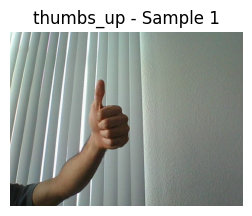

Prepare for next capture...
Capturing image 2/5 for 'thumbs_up'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_up/thumbs_up_b435c62c-1a24-403a-9f22-27fa27facf85.jpg


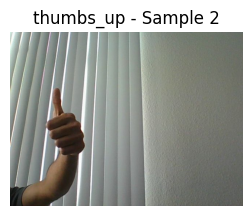

Prepare for next capture...
Capturing image 3/5 for 'thumbs_up'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_up/thumbs_up_6dbea012-dfc8-497b-b643-b047ec8bc49f.jpg


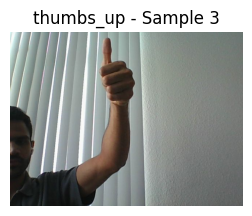

Prepare for next capture...
Capturing image 4/5 for 'thumbs_up'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_up/thumbs_up_bb31adf8-3d1a-4b9c-a15d-e804f82e3970.jpg


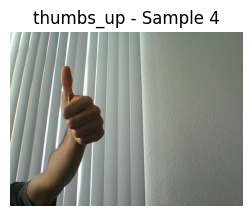

Prepare for next capture...
Capturing image 5/5 for 'thumbs_up'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_up/thumbs_up_ca21ff5b-a6ba-4ae2-b79e-0bc65479875d.jpg


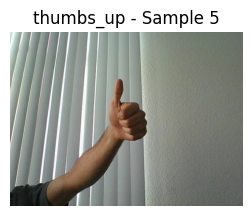

Completed collection for 'thumbs_up' gesture!

===== Collecting images for 'thumbs_down' gesture =====
Prepare to show the 'thumbs_down' gesture. Press Enter when ready.

Capturing image 1/5 for 'thumbs_down'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_down/thumbs_down_15183f79-65fc-4719-a9a1-90290615fcd4.jpg


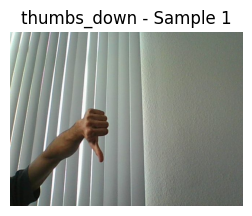

Prepare for next capture...
Capturing image 2/5 for 'thumbs_down'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_down/thumbs_down_64743e2c-ed52-40a6-bb2c-34198e9e86e5.jpg


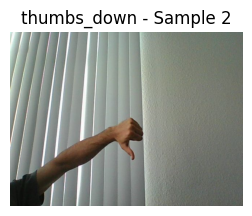

Prepare for next capture...
Capturing image 3/5 for 'thumbs_down'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_down/thumbs_down_f47f35ac-6a16-4988-b5a2-2fa130c819f8.jpg


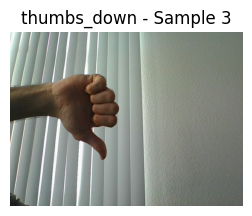

Prepare for next capture...
Capturing image 4/5 for 'thumbs_down'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_down/thumbs_down_79fa6465-9b5b-4a14-87d9-f3ca4b13910d.jpg


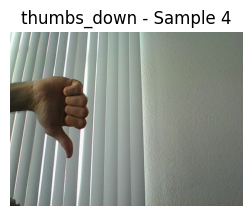

Prepare for next capture...
Capturing image 5/5 for 'thumbs_down'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/thumbs_down/thumbs_down_04a30d69-6ea3-4c97-9913-916281c02540.jpg


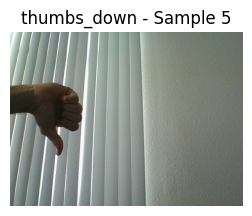

Completed collection for 'thumbs_down' gesture!

===== Collecting images for 'peace' gesture =====
Prepare to show the 'peace' gesture. Press Enter when ready.

Capturing image 1/5 for 'peace'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/peace/peace_da3da017-a3ee-4874-9e7a-0cb5f8fb30d2.jpg


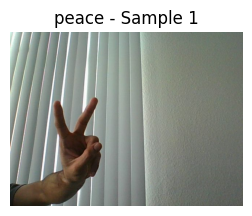

Prepare for next capture...
Capturing image 2/5 for 'peace'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/peace/peace_31d61749-6401-4f78-ae4a-579218f9a4e7.jpg


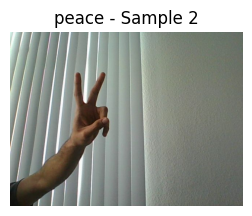

Prepare for next capture...
Capturing image 3/5 for 'peace'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/peace/peace_bb90b4a6-8aeb-438d-a13f-64d4b8c7f8cf.jpg


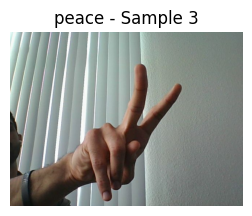

Prepare for next capture...
Capturing image 4/5 for 'peace'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/peace/peace_4169dc69-34f2-4cc1-bcb3-edb6c8143b93.jpg


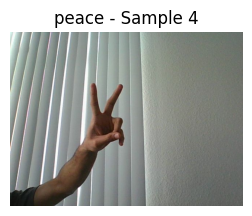

Prepare for next capture...
Capturing image 5/5 for 'peace'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/peace/peace_21030123-5afc-4e3f-93b2-6b2912bc2876.jpg


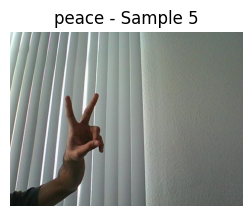

Completed collection for 'peace' gesture!

===== Collecting images for 'open_palm' gesture =====
Prepare to show the 'open_palm' gesture. Press Enter when ready.

Capturing image 1/5 for 'open_palm'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/open_palm/open_palm_1e07b063-01b0-4beb-aade-d36d2761b076.jpg


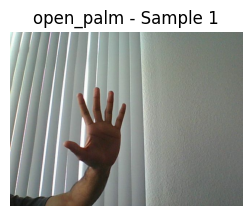

Prepare for next capture...
Capturing image 2/5 for 'open_palm'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/open_palm/open_palm_c0e977c7-be56-4820-bcd1-7bfc1755b541.jpg


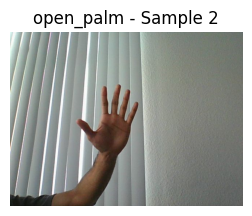

Prepare for next capture...
Capturing image 3/5 for 'open_palm'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/open_palm/open_palm_d50cc517-5421-4472-9165-3ced42014eff.jpg


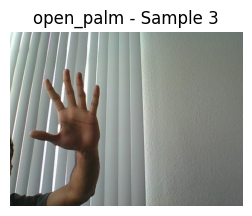

Prepare for next capture...
Capturing image 4/5 for 'open_palm'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/open_palm/open_palm_61790224-20f1-49f5-b2b6-48d4cf6ecf18.jpg


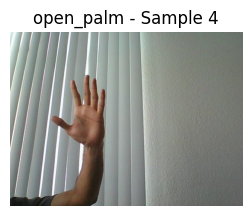

Prepare for next capture...
Capturing image 5/5 for 'open_palm'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/open_palm/open_palm_91b34e92-2def-4228-8db8-c9285a09052e.jpg


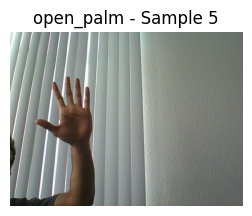

Completed collection for 'open_palm' gesture!

===== Collecting images for 'closed_fist' gesture =====
Prepare to show the 'closed_fist' gesture. Press Enter when ready.

Capturing image 1/5 for 'closed_fist'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/closed_fist/closed_fist_6438967b-04bf-43f2-99b2-f98b87f4cffa.jpg


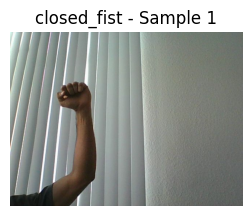

Prepare for next capture...
Capturing image 2/5 for 'closed_fist'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/closed_fist/closed_fist_1d433361-9319-40a4-aeae-5a20246e66c1.jpg


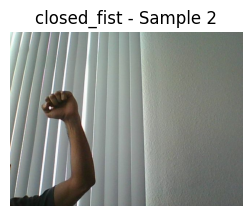

Prepare for next capture...
Capturing image 3/5 for 'closed_fist'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/closed_fist/closed_fist_3cf76e0b-53f3-4f95-86a4-325b85e23561.jpg


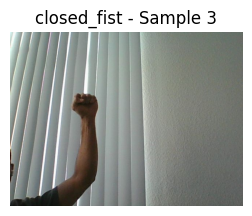

Prepare for next capture...
Capturing image 4/5 for 'closed_fist'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/closed_fist/closed_fist_8db5ce73-5add-4998-86d4-b143ef7d3483.jpg


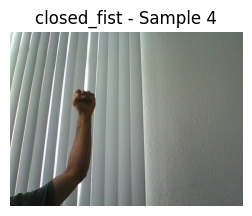

Prepare for next capture...
Capturing image 5/5 for 'closed_fist'
Position your hand and press the 'Capture' button that appears below


<IPython.core.display.Javascript object>

Saved to hand_gestures/closed_fist/closed_fist_624b7e6b-f45f-4059-9c98-bb1206601773.jpg


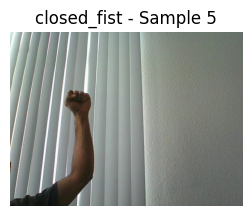

Completed collection for 'closed_fist' gesture!


In [4]:
# Cell 5: Collect image samples for each gesture class
def collect_training_data(base_path, classes, samples_per_class=20):
    for class_name in classes:
        print(f"\n===== Collecting images for '{class_name}' gesture =====")
        print(f"Prepare to show the '{class_name}' gesture. Press Enter when ready.")
        input()  # Wait for user to press Enter

        class_path = os.path.join(base_path, class_name)

        for i in range(samples_per_class):
            print(f"Capturing image {i+1}/{samples_per_class} for '{class_name}'")
            print("Position your hand and press the 'Capture' button that appears below")

            # Generate a unique filename
            filename = os.path.join(class_path, f"{class_name}_{uuid.uuid4()}.jpg")

            # Take photo
            take_photo(filename)

            # Display confirmation
            print(f"Saved to {filename}")

            # Show the captured image
            img = cv2.imread(filename)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(3, 3))
            plt.imshow(img)
            plt.title(f"{class_name} - Sample {i+1}")
            plt.axis('off')
            plt.show()

            if i < samples_per_class - 1:
                print("Prepare for next capture...")
                time.sleep(1)  # Short pause between captures

        print(f"Completed collection for '{class_name}' gesture!")

# Uncomment the following lines to run the data collection
# (Note: Only run this when you're ready to collect data)
base_path, classes = create_folders()
collect_training_data(base_path, classes, samples_per_class=5)  # Reduced to 5 for demonstration

## Data Preparation

Now that we have our image dataset, we need to prepare it for model training. This step involves:

1. **Image Data Generators**:
   - These prepare and feed batches of images to our model during training
   - They handle loading, resizing, and normalizing the images
   - They can also perform data augmentation (creating variations of images to improve model robustness)

2. **Data Augmentation**:
   - Applies random transformations to training images (rotation, zoom, flip, etc.)
   - Helps the model generalize better by seeing variations of the same gesture
   - Makes the model more robust to different hand positions and lighting conditions

3. **Train/Validation Split**:
   - We set aside 20% of our data for validation
   - This helps us monitor if the model is learning properly without overfitting

In Teachable Machine, these preprocessing steps happen automatically behind the scenes when you click "Train Model."

In [5]:
# Cell 7: Prepare the dataset for training using data generators
# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Create image data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom transformations
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest',      # Fill strategy for newly created pixels
    validation_split=0.2      # Set aside 20% of images for validation
)

# Generator for training data
train_generator = train_datagen.flow_from_directory(
    'hand_gestures',          # Directory containing class subdirectories
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'         # Specify training subset
)

# Generator for validation data (no augmentation needed)
validation_generator = train_datagen.flow_from_directory(
    'hand_gestures',          # Same directory, but validation split
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'       # Specify validation subset
)

# Get class labels
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

print(f"Found {len(train_generator.filenames)} training images in {num_classes} classes")
print(f"Found {len(validation_generator.filenames)} validation images")
print(f"Class names: {class_names}")

Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.
Found 20 training images in 5 classes
Found 5 validation images
Class names: ['closed_fist', 'open_palm', 'peace', 'thumbs_down', 'thumbs_up']


## Model Architecture

For hand gesture recognition, we'll use a Convolutional Neural Network (CNN), which is specifically designed for image data.

Our CNN architecture includes:

1. **Convolutional Layers**: These detect patterns such as edges, textures, and shapes in the images
   - We use three convolutional blocks with increasing filter sizes (32, 64, 128)
   - Each block includes a max pooling layer to reduce dimensions and focus on important features

2. **Flatten Layer**: Converts the 2D feature maps to a 1D vector for the dense layers

3. **Dense Layers**: Make the final classification based on extracted features
   - A 512-unit layer for advanced feature combination
   - Dropout to prevent overfitting (randomly ignoring some neurons during training)
   - Final layer with one unit per gesture class and softmax activation

This architecture is similar to what Teachable Machine might use behind the scenes, though Teachable Machine typically uses a pre-trained model with transfer learning for better performance with less data.

In [6]:
# Cell 9: Build the CNN model for hand gesture recognition
def create_model(num_classes):
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(2, 2),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        # Flatten and dense layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),  # Prevents overfitting
        Dense(num_classes, activation='softmax')  # Output layer, one node per class
    ])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
model = create_model(num_classes)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,229 (72.62 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

Now we'll train our CNN on the prepared dataset. During training:

1. The model processes batches of images and their corresponding labels
2. It adjusts its internal parameters to better classify the gestures
3. It evaluates its performance on the validation set after each epoch

Key training parameters:
- **Epochs**: We'll train for 15 complete passes through the dataset
- **Batch size**: Process 32 images at a time
- **ModelCheckpoint**: Saves the best-performing model based on validation accuracy

This training process is equivalent to clicking the "Train Model" button in Teachable Machine, but here we have more control over the training parameters and can monitor the process in detail.

In Teachable Machine, the interface would show a progress bar and preview of what the model is learning while this process runs in the background.

In [7]:
# Cell 11: Train the model
epochs = 500

# Use ModelCheckpoint to save the best model during training
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_hand_gesture_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]
)

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_hand_gesture_model.h5')

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1500 - loss: 1.6178
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_hand_gesture_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.1500 - loss: 1.6178 - val_accuracy: 0.2000 - val_loss: 1.8678
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1000 - loss: 2.3869
Epoch 2: val_accuracy did not improve from 0.20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.1000 - loss: 2.3869 - val_accuracy: 0.2000 - val_loss: 1.7617
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.2500 - loss: 1.8064
Epoch 3: val_accuracy did not improve from 0.20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.2500 - loss: 1.8064 - val_accuracy: 0.2000 - val_loss: 1.6431
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.2000 - loss: 1.7491
Epoch 4: val_accuracy did not improve from 0.20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.2000 - loss: 1.7491 - val_accuracy: 0.2000 - val_loss: 1.6216
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.1500 - loss: 1.6348
Epoch 5: val_accuracy improved from 0.20000 to 0.4

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - accuracy: 0.1500 - loss: 1.6348 - val_accuracy: 0.4000 - val_loss: 1.5821
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.2000 - loss: 1.5972
Epoch 6: val_accuracy did not improve from 0.40000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.2000 - loss: 1.5972 - val_accuracy: 0.2000 - val_loss: 1.6106
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3000 - loss: 1.5918
Epoch 7: val_accuracy did not improve from 0.40000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.3000 - loss: 1.5918 - val_accuracy: 0.2000 - val_loss: 1.5895
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2500 - loss: 1.6305
Epoch 8: val_accuracy did not improve from 0.40000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.2500 - loss: 1.6305 - val_accuracy: 0.2000 - val_loss: 1.6075
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.3000 - loss: 1.5939
Epoch 9: val_accuracy did not improve from 0.40

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step - accuracy: 0.3000 - loss: 1.5891 - val_accuracy: 0.6000 - val_loss: 1.5829
Epoch 23/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.2000 - loss: 1.6025
Epoch 23: val_accuracy did not improve from 0.60000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - accuracy: 0.2000 - loss: 1.6025 - val_accuracy: 0.0000e+00 - val_loss: 1.6131
Epoch 24/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2500 - loss: 1.5937
Epoch 24: val_accuracy did not improve from 0.60000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.2500 - loss: 1.5937 - val_accuracy: 0.2000 - val_loss: 1.5794
Epoch 25/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.2000 - loss: 1.6028
Epoch 25: val_accuracy did not improve from 0.60000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.2000 - loss: 1.6028 - val_accuracy: 0.2000 - val_loss: 1.5698
Epoch 26/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.2500 - loss: 1.5608
Epoch 26: val_accuracy did not impro

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - accuracy: 0.3500 - loss: 1.5463 - val_accuracy: 0.8000 - val_loss: 1.2626
Epoch 39/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.2500 - loss: 1.5733
Epoch 39: val_accuracy did not improve from 0.80000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.2500 - loss: 1.5733 - val_accuracy: 0.2000 - val_loss: 1.8335
Epoch 40/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.4500 - loss: 1.5015
Epoch 40: val_accuracy did not improve from 0.80000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4500 - loss: 1.5015 - val_accuracy: 0.2000 - val_loss: 1.5639
Epoch 41/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.3500 - loss: 1.5022
Epoch 41: val_accuracy did not improve from 0.80000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.3500 - loss: 1.5022 - val_accuracy: 0.6000 - val_loss: 1.3536
Epoch 42/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3000 - loss: 1.5646
Epoch 42: val_accuracy did not improve f

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 1.3272 - val_accuracy: 1.0000 - val_loss: 0.9071
Epoch 106/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6000 - loss: 1.1102
Epoch 106: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.6000 - loss: 1.1102 - val_accuracy: 0.6000 - val_loss: 1.1562
Epoch 107/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6500 - loss: 0.9962
Epoch 107: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.6500 - loss: 0.9962 - val_accuracy: 0.2000 - val_loss: 1.6726
Epoch 108/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7000 - loss: 0.9852
Epoch 108: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7000 - loss: 0.9852 - val_accuracy: 0.4000 - val_loss: 1.6344
Epoch 109/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6000 - loss: 1.1993
Epoch 109: val_accuracy did not impr

## Evaluating Model Performance

After training, we need to assess how well our model performs. We'll do this in two ways:

1. **Training History Visualization**:
   - Plotting accuracy and loss curves over training epochs
   - Tracking how both training and validation metrics improved
   - Identifying potential overfitting (when training continues to improve but validation plateaus or worsens)

2. **Final Validation Metrics**:
   - Measuring accuracy on the validation dataset
   - This represents how well the model will perform on new, unseen hand gestures

In Teachable Machine, after training completes, you'd see an evaluation screen showing how well the model performs on the training examples and providing an opportunity to test with new inputs.

These visualizations help us understand:
- If our model trained properly
- If we need more training data or epochs
- If we're overfitting to our training data

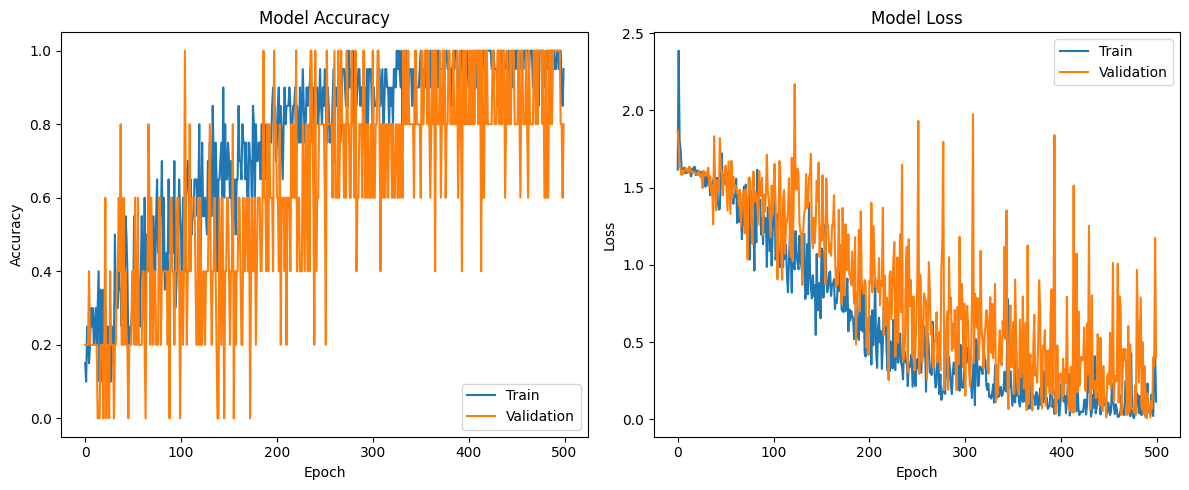

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.8000 - loss: 1.0036
Validation accuracy: 0.8000
Validation loss: 1.0036


In [8]:
# Cell 13: Visualize training results
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on the validation data
val_loss, val_accuracy = best_model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation loss: {val_loss:.4f}")

## Testing the Model

Now that we have a trained model, we can test it on new images to see how well it recognizes hand gestures. This is similar to the "Test" panel in Teachable Machine.

We've created two functions for testing:
1. `predict_gesture()`: Takes an image file and runs it through our model
   - Displays the image with its predicted class and confidence
   - Shows a bar chart of confidence scores for all gesture classes

2. `test_with_capture()`: Captures a new image from your webcam and then classifies it
   - This simulates the real-time testing feature in Teachable Machine

This testing process allows you to:
- Verify how well your model performs on new gestures
- See the model's confidence across all possible classes
- Identify potential cases where the model might be confused

To test the model, uncomment either the `predict_gesture()` call to test with an existing image or the `test_with_capture()` call to test with a new webcam image.

Position your hand to show a gesture, then press the Capture button when ready


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


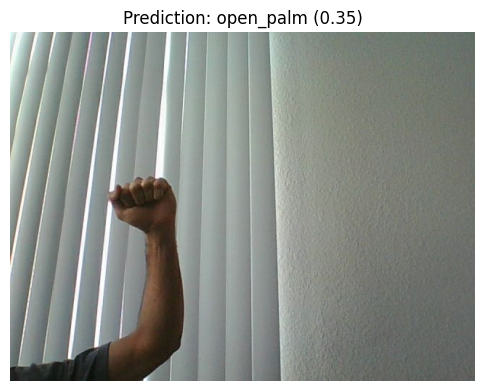

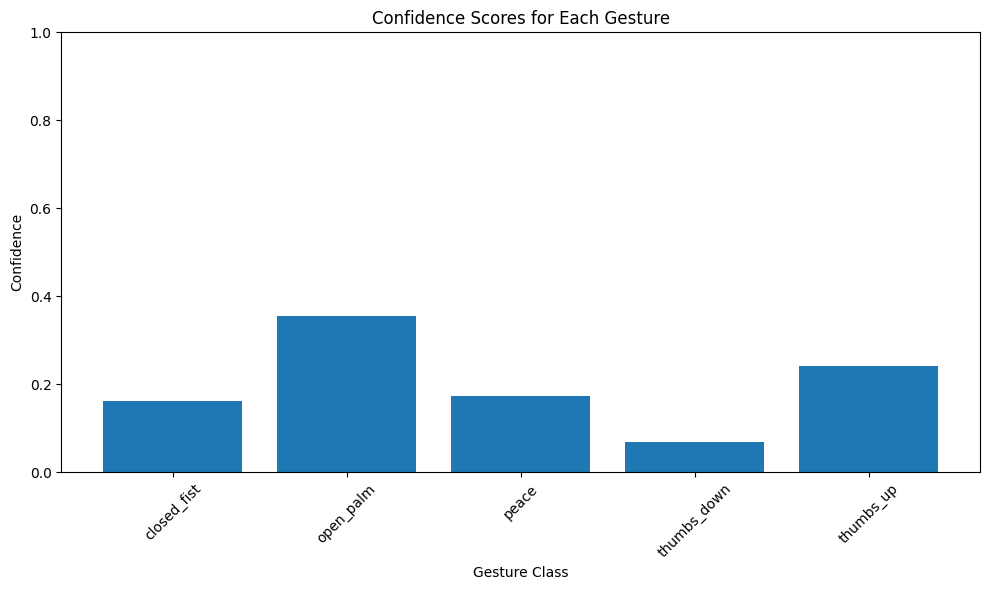

Predicted gesture: open_palm with confidence 0.35


('open_palm', np.float32(0.3543416))

In [9]:
# Cell 15: Create a function to test the model with new images
def predict_gesture(image_path, model, class_names):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image to match model input size
    img_resized = cv2.resize(img, (img_height, img_width))

    # Normalize pixel values
    img_normalized = img_resized / 255.0

    # Add batch dimension
    img_batch = np.expand_dims(img_normalized, axis=0)

    # Make prediction
    predictions = model.predict(img_batch)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

    # Display confidence for all classes as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, predictions[0])
    plt.ylim(0, 1)
    plt.title('Confidence Scores for Each Gesture')
    plt.xlabel('Gesture Class')
    plt.ylabel('Confidence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return predicted_class, confidence, predictions[0]

# Test the model with a new image
# Replace 'test_image_path.jpg' with the path to your test image
# test_image_path = 'hand_gestures/thumbs_up/test_image.jpg'
# predicted_class, confidence, all_scores = predict_gesture(test_image_path, best_model, class_names)

# To test with a live capture:
def test_with_capture():
    print("Position your hand to show a gesture, then press the Capture button when ready")
    test_image_path = take_photo('test_gesture.jpg')
    predicted_class, confidence, all_scores = predict_gesture(test_image_path, best_model, class_names)
    print(f"Predicted gesture: {predicted_class} with confidence {confidence:.2f}")
    return predicted_class, confidence

# Uncomment to test with live capture
test_with_capture()

## Exporting the Model

Just like in Teachable Machine, we need to export our trained model for deployment in real-world applications. We'll save the model in multiple formats:

1. **Keras H5 Format** (`.h5`):
   - Standard format for TensorFlow/Keras models
   - Suitable for deployment in Python environments

2. **TensorFlow.js** format:
   - Enables deployment in web browsers
   - Similar to Teachable Machine's "Web" export option
   - Allows users to interact with the model through a web interface

3. **Class Names JSON**:
   - We also save the mapping between class indices and class names
   - This ensures our deployment knows how to label the model's predictions

These export options provide flexibility for deploying your hand gesture recognition model in various applications, from web apps to mobile devices and embedded systems.

In [10]:
# Cell 17: Export the model for deployment
# Save the model in Keras format
best_model.save('hand_gesture_recognition_model.h5')

# Convert to TensorFlow.js format for web deployment
!pip install -q tensorflowjs
import tensorflowjs as tfjs

# Create directory for TF.js model
!mkdir -p tfjs_hand_gesture_model
tfjs.converters.save_keras_model(best_model, 'tfjs_hand_gesture_model')

# Save class names to a JSON file for the web app to use
import json
with open('tfjs_hand_gesture_model/class_names.json', 'w') as f:
    json.dump(class_names, f)

print("Model saved in the following formats:")
print("1. Keras H5 format: hand_gesture_recognition_model.h5")
print("2. TensorFlow.js format: tfjs_hand_gesture_model/")
print("3. Class names saved as: tfjs_hand_gesture_model/class_names.json")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


failed to lookup keras version from the file,
    this is likely a weight only file
Model saved in the following formats:
1. Keras H5 format: hand_gesture_recognition_model.h5
2. TensorFlow.js format: tfjs_hand_gesture_model/
3. Class names saved as: tfjs_hand_gesture_model/class_names.json


In [11]:
# Cell 19: Create a simple HTML interface for the model
%%writefile hand_gesture_recognition.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Hand Gesture Recognition</title>
    <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@3.11.0"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }
        .container {
            display: flex;
            flex-direction: column;
            align-items: center;
        }
        #webcam-container {
            margin-bottom: 20px;
            position: relative;
        }
        #webcam {
            border: 2px solid #333;
            border-radius: 8px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            padding: 10px 20px;
            margin: 10px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
        }
        button:hover {
            background-color: #45a049;
        }
        button:disabled {
            background-color: #cccccc;
            cursor: not-allowed;
        }
        #prediction-container {
            margin-top: 20px;
            text-align: center;
            width: 100%;
        }
        .gesture-label {
            font-size: 24px;
            font-weight: bold;
            margin: 10px 0;
        }
        .confidence-bar {
            height: 30px;
            background-color: #e0e0e0;
            border-radius: 15px;
            margin: 10px 0;
            position: relative;
        }
        .confidence-level {
            height: 100%;
            border-radius: 15px;
            background-color: #4CAF50;
            display: flex;
            align-items: center;
            justify-content: center;
            color: white;
            font-weight: bold;
        }
        .prediction-chart {
            width: 100%;
            margin-top: 20px;
        }
        .chart-bar {
            height: 30px;
            margin: 5px 0;
            display: flex;
            align-items: center;
        }
        .chart-label {
            width: 100px;
            text-align: right;
            padding-right: 10px;
        }
        .chart-value {
            height: 100%;
            background-color: #2196F3;
            display: flex;
            align-items: center;
            padding-left: 10px;
            color: white;
        }
    </style>
</head>
<body>
    <h1>Hand Gesture Recognition</h1>
    <p>This application demonstrates a Teachable Machine-style hand gesture recognition system.</p>

    <div class="container">
        <div id="webcam-container">
            <video id="webcam" autoplay playsinline width="400" height="300"></video>
        </div>

        <div class="buttons">
            <button id="start-button">Start Webcam</button>
            <button id="predict-button" disabled>Recognize Gesture</button>
        </div>

        <div id="prediction-container" style="display: none;">
            <h2>Prediction Result</h2>
            <div class="gesture-label" id="prediction-label">-</div>
            <div class="confidence-bar">
                <div class="confidence-level" id="confidence-level" style="width: 0%">0%</div>
            </div>

            <div class="prediction-chart" id="prediction-chart"></div>
        </div>
    </div>

    <script>
        // DOM elements
        const webcamElement = document.getElementById('webcam');
        const startButton = document.getElementById('start-button');
        const predictButton = document.getElementById('predict-button');
        const predictionContainer = document.getElementById('prediction-container');
        const predictionLabel = document.getElementById('prediction-label');
        const confidenceLevel = document.getElementById('confidence-level');
        const predictionChart = document.getElementById('prediction-chart');

        // Global variables
        let model;
        let classNames = ['thumbs_up', 'thumbs_down', 'peace', 'open_palm', 'closed_fist']; // Default class names, will be updated when model loads
        let webcamStream;

        // Start webcam
        startButton.addEventListener('click', async () => {
            try {
                webcamStream = await navigator.mediaDevices.getUserMedia({
                    video: { width: 400, height: 300 }
                });
                webcamElement.srcObject = webcamStream;
                startButton.disabled = true;
                predictButton.disabled = false;

                // Load the model (in a real app, this would load your exported TF.js model)
                // model = await tf.loadLayersModel('tfjs_hand_gesture_model/model.json');
                // console.log('Model loaded');

                // For demo, we'll simulate model loading
                setTimeout(() => {
                    console.log('Model loaded (simulated)');
                }, 1000);

            } catch (error) {
                console.error('Error accessing webcam:', error);
            }
        });

        // Predict gesture
        predictButton.addEventListener('click', async () => {
            // In a real application, we would:
            // 1. Capture the current frame from the webcam
            // 2. Preprocess the image (resize, normalize)
            // 3. Run inference through the loaded TF.js model
            // 4. Display the prediction results

            // For this demo, we'll simulate a prediction
            simulatePrediction();

            // Show prediction container
            predictionContainer.style.display = 'block';
        });

        // Simulate model prediction (for demo purposes)
        function simulatePrediction() {
            // Generate random prediction scores
            const scores = Array(classNames.length).fill().map(() => Math.random());
            const sum = scores.reduce((a, b) => a + b, 0);
            const normalizedScores = scores.map(score => score / sum);

            // Find the highest score and its index
            const maxScore = Math.max(...normalizedScores);
            const maxScoreIndex = normalizedScores.indexOf(maxScore);
            const predictedClass = classNames[maxScoreIndex];

            // Update the UI
            predictionLabel.textContent = predictedClass.replace('_', ' ');
            const confidencePercent = Math.round(maxScore * 100);
            confidenceLevel.style.width = `${confidencePercent}%`;
            confidenceLevel.textContent = `${confidencePercent}%`;

            // Create bar chart for all class confidences
            predictionChart.innerHTML = '';
            normalizedScores.forEach((score, index) => {
                const className = classNames[index].replace('_', ' ');
                const percent = Math.round(score * 100);

                const chartBar = document.createElement('div');
                chartBar.className = 'chart-bar';

                const chartLabel = document.createElement('div');
                chartLabel.className = 'chart-label';
                chartLabel.textContent = className;

                const chartValue = document.createElement('div');
                chartValue.className = 'chart-value';
                chartValue.style.width = `${percent}%`;
                chartValue.textContent = `${percent}%`;

                chartBar.appendChild(chartLabel);
                chartBar.appendChild(chartValue);
                predictionChart.appendChild(chartBar);
            });
        }
    </script>
</body>
</html>

Writing hand_gesture_recognition.html


In [12]:
import os
import shutil
import zipfile
from google.colab import files

# Path to the folder you want to download
folder_path = 'tfjs_hand_gesture_model'

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Error: The folder '{folder_path}' does not exist.")
else:
    # Create a zip file of the folder
    zip_filename = f"{folder_path}.zip"

    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through all files in the directory
        for root, dirs, filenames in os.walk(folder_path):
            for filename in filenames:
                # Create the full filepath
                file_path = os.path.join(root, filename)
                # Add file to the zip file
                # The arcname parameter specifies the path in the zip file
                zipf.write(file_path, arcname=os.path.relpath(file_path, os.path.dirname(folder_path)))

    # Download the zip file
    files.download(zip_filename)
    print(f"Downloaded '{folder_path}' as '{zip_filename}'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded 'tfjs_hand_gesture_model' as 'tfjs_hand_gesture_model.zip'.
